# Winnining Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [1]:
# Import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Bring each CSV into a separate data frame
wwe2013 = pd.read_csv('Resources/WWE-Data-2013.csv')
wwe2014 = pd.read_csv('Resources/WWE-Data-2014.csv')
wwe2015 = pd.read_csv('Resources/WWE-Data-2015.csv')
wwe2016 = pd.read_csv('Resources/WWE-Data-2016.csv')

In [3]:
# Merge the first two datasets (2013 and 2014) on "Wrestler" so that no data is lost (should be 182 rows)
wwe1314 = pd.merge(wwe2013, wwe2014, on='Wrestler', how='outer')
wwe1314.head()

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [4]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"
wwe1314.rename(columns={"Wins_x": "2013 Wins", "Losses_x": "2013 Losses", "Draws_x": "2013 Draws"}, inplace=True)
# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"
wwe1314.rename(columns={"Wins_y": "2014 Wins", "Losses_y": "2014 Losses", "Draws_y": "2014 Draws"}, inplace=True)
wwe1314.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [5]:
# Merge our newly combined dataframe with the 2015 dataframe
wwe131415 = pd.merge(wwe1314, wwe2015, on='Wrestler', how='outer')
wwe131415.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [6]:
# Rename "wins", "losses", and "draws" to "2015 Wins", "2015 Losses", and "2015 Draws"
wwe131415.rename(columns={"Wins": "2015 Wins", "Losses": "2015 Losses", "Draws": "2015 Draws"}, inplace=True)
wwe131415.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [7]:
# Merge our newly combined dataframe with the 2016 dataframe
wwe_all = pd.merge(wwe131415, wwe2016, on='Wrestler', how='outer')
wwe_all.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


In [8]:
# Rename "wins", "losses", and "draws" to "2016 Wins", "2016 Losses", and "2016 Draws"
wwe_all.rename(columns={"Wins": "2016 Wins", "Losses": "2016 Losses", "Draws": "2016 Draws"}, inplace=True)
wwe_all.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


### Part 2 - Time to Calculate!

* When your tables have been merged together into one data frame, calculate the total number of wins, losses, and draws a wrestler has had over the course of their career. Also create a new column that will hold the total matches a wrestler has been in over the course of their career.

    * You will need to convert all NaN values to a number so that you can perform these calculations

* We are only interested in those wrestlers who have been with the WWE from 2013 to 2016. You will need to come up with some way of filtering out rows that do not meet these conditions.
    
    * Also set the 'Wrestler' column as your key for easier referencing later on.

In [9]:
# Replace all NaN values with 0 
wwe_all.fillna(value=0, inplace=True)

# Create a new column called "Total Wins" and add up each wrestler's wins per year to fill in the values
wwe_all['Total Wins'] = wwe_all['2013 Wins'] + wwe_all['2014 Wins'] + wwe_all['2015 Wins'] + wwe_all['2016 Wins']

# Create a new column called "Total Losses" and add up each wrestler's losses per year to fill in the values
wwe_all['Total Losses'] = wwe_all['2013 Losses'] + wwe_all['2014 Losses'] + wwe_all['2015 Losses'] + wwe_all['2016 Losses']

# Create a new column called "Total Draws" and add up each wrestler's draws per year to fill in the values
wwe_all['Total Draws'] = wwe_all['2013 Draws'] + wwe_all['2014 Draws'] + wwe_all['2015 Draws'] + wwe_all['2016 Draws']

# Create a new column called "Total Matches" and add up the total wins, losses, and draws for each wrestler to fill in the values
wwe_all['Total Matches'] = wwe_all['Total Wins'] + wwe_all['Total Losses'] + wwe_all['Total Draws']
wwe_all.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0


In [10]:
wwe_all.set_index("Wrestler", inplace=True)

In [11]:
wwe_all.head(10)

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0
Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0,103.0,287.0,5.0,395.0
Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0,207.0,213.0,9.0,429.0


In [12]:
only_2013_to_2016 = wwe_all.dropna(how='any')
only_2013_to_2016

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0
Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0,103.0,287.0,5.0,395.0
Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0,207.0,213.0,9.0,429.0


In [13]:
# Create a new dataframe for those wrestlers who have wrestled at least 100 matches,
# have at least one win in 2013,
# and have at least one win in 2016
wrest_conditions = only_2013_to_2016.loc[(only_2013_to_2016['Total Matches'] > 100) & (only_2013_to_2016['2013 Wins'] > 0) & only_2013_to_2016['2016 Wins'] > 0]
wrest_conditions.head(10)

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0
Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0,103.0,287.0,5.0,395.0
Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0,207.0,213.0,9.0,429.0
Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0,114.0,56.0,2.0,425.0,285.0,7.0,717.0
Jack Swagger,56.0,96.0,2.0,49.0,123.0,1.0,65.0,65.0,0.0,73.0,70.0,0.0,243.0,354.0,3.0,600.0


### Part 3 - Charting Careers

* Store an individual wrestler's wins over time in a variable
* Store that same wrestler's losses over time in a variable as well
* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016

In [14]:
# Collect the user's input to search through our data frame
user_wrestler = input("Choose a wrestler: ")

Choose a wrestler: Dean Ambrose


In [15]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
wrestler_wins = wrest_conditions.loc[user_wrestler, ['2013 Wins', '2014 Wins', '2015 Wins', '2016 Wins']]
wrestler_wins
# Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
wrestler_losses = wrest_conditions.loc[user_wrestler, ['2013 Losses', '2014 Losses', '2015 Losses', '2016 Losses']]
wrestler_losses

2013 Losses    134.0
2014 Losses     36.0
2015 Losses     63.0
2016 Losses     67.0
Name: Dean Ambrose, dtype: float64

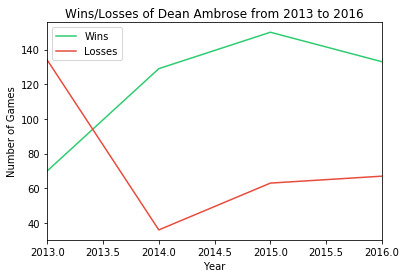

In [17]:
# Create a list of the years that we will use as our x axis
years = np.arange(2013,2017)
years

# Plot our line that will be used to track a wrestler's wins over the years
wins, = plt.plot(years, wrestler_wins, color="#2ecc71", label="Wins")

# Plot our line that will be used to track a wrestler's losses over the years
losses, = plt.plot(years, wrestler_losses, color="#e74c3c", label="Losses")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Wins/Losses of " + user_wrestler + " from 2013 to 2016")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.xlim(2013,2016)

# Print our chart to the screen
plt.show()